#Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.src.metrics import Precision, Recall
from tensorflow.python.keras import layers, models, optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#Data Preprocessing

##Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


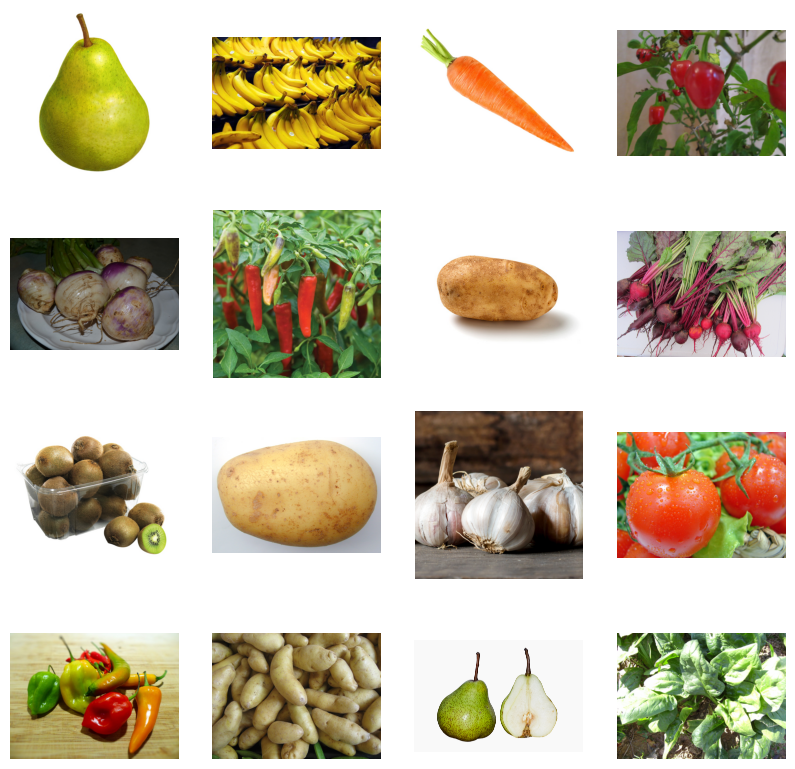

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your test directory
train_PATH = 'Dataset/train'
valid_PATH = 'Dataset/validation'
test_PATH = 'Dataset/test'

# Get the list of all subdirectories (classes)
classes = os.listdir(train_PATH)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(train_PATH, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()

#Building Model

In [5]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [7]:
# First Convolutional Block
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(64, 64, 3)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

#Compiling and Training Phase

In [11]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

In [12]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 713,860 (2.72 MB)

 Trainable params: 711,300 (2.71 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [13]:
from keras.src.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='Saved Models/best_model.keras', monitor="val_accuracy", mode="max",
                          save_best_only=True, verbose=1)

In [14]:
callbacks = [checkpoint]

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=300, callbacks=callbacks)

Epoch 1/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - AUC: 0.5539 - Precision: 0.0440 - Recall: 0.0059 - accuracy: 0.0445 - loss: 4.6706
Epoch 1: val_accuracy improved from -inf to 0.07977, saving model to Saved Models/best_model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 619ms/step - AUC: 0.5544 - Precision: 0.0443 - Recall: 0.0059 - accuracy: 0.0446 - loss: 4.6677 - val_AUC: 0.7572 - val_Precision: 0.2857 - val_Recall: 0.0057 - val_accuracy: 0.0798 - val_loss: 3.1845
Epoch 2/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - AUC: 0.7125 - Precision: 0.2151 - Recall: 0.0293 - accuracy: 0.1200 - loss: 3.6429
Epoch 2: val_accuracy improved from 0.07977 to 0.16524, saving model to Saved Models/best_model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 692ms/step - AUC: 0.7127 - Precision: 0.2150 - Recall: 0.0293 - accuracy: 0.1201 - loss: 3.6415 - val_AUC: 0.8277 - val_Precision: 0.3250 - val_Recall: 0.0370 - val_accuracy: 0.1652 - val_loss: 2.9368
Epoch 3/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - AUC:

##Evaluating Model

In [15]:
print(training_history.history.keys())

dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss'])


In [16]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - AUC: 0.8131 - Precision: 0.3623 - Recall: 0.1734 - accuracy: 0.2543 - loss: 3.0846


ValueError: too many values to unpack (expected 2)

In [17]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - AUC: 0.8495 - Precision: 0.4189 - Recall: 0.1962 - accuracy: 0.3228 - loss: 2.6939


ValueError: too many values to unpack (expected 2)

##Saving Model

In [36]:
cnn.save('trained_model.h5')

In [18]:
training_history.history #Return Dictionary of history

{'AUC': [0.5973786115646362,
  0.7424560189247131,
  0.8088815212249756,
  0.8380561470985413,
  0.8577042818069458,
  0.8774670362472534,
  0.8874636292457581,
  0.8935626149177551,
  0.8964107632637024,
  0.9093118906021118,
  0.914383590221405,
  0.9178287982940674,
  0.926762580871582,
  0.9270635843276978,
  0.9301164150238037,
  0.9321913719177246,
  0.936189591884613,
  0.9416856169700623,
  0.9435753226280212,
  0.945765495300293,
  0.9470986723899841,
  0.9498844742774963,
  0.9531973600387573,
  0.9570848941802979,
  0.9524821043014526,
  0.9575783014297485,
  0.9587388634681702,
  0.9621660709381104,
  0.961765468120575,
  0.9636244773864746,
  0.9683264493942261,
  0.9649730920791626],
 'Precision': [0.06960556656122208,
  0.17450980842113495,
  0.22359155118465424,
  0.2876480519771576,
  0.3444612920284271,
  0.4089635908603668,
  0.3986577093601227,
  0.4607464671134949,
  0.47001224756240845,
  0.5225653052330017,
  0.544224739074707,
  0.5379812717437744,
  0.590350031

In [20]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

##Calculating Accuracy of Model Achieved on Validation set

In [22]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 29.05983030796051 %


#Accuracy Visualization

##Training Visualization

In [42]:
#training_history.history['accuracy']

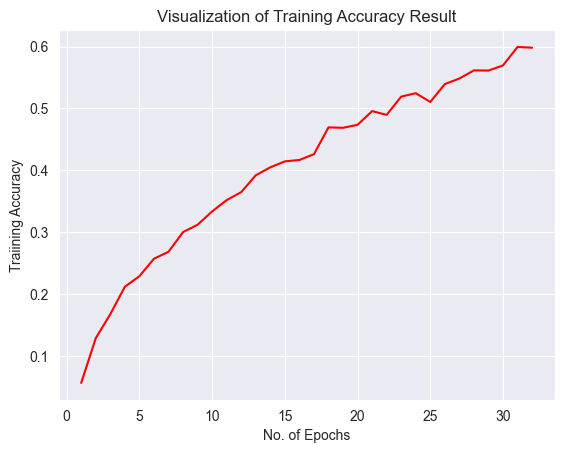

In [23]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

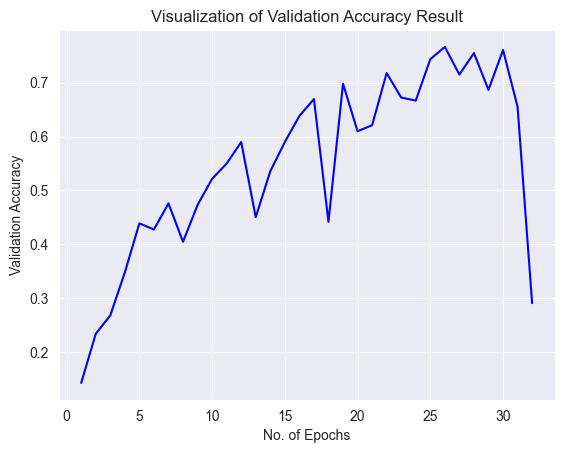

In [24]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [27]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - AUC: 0.8403 - Precision: 0.3974 - Recall: 0.1702 - accuracy: 0.2789 - loss: 2.8130


ValueError: too many values to unpack (expected 2)